<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Kopia_notatnika_NLP_plain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
!pip install svgling==0.3.1
!pip install gensim==4.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 6.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## Corpuses

In [ ]:
import nltk.corpus
print(dir(nltk.corpus))

['AlignedCorpusReader', 'AlpinoCorpusReader', 'BNCCorpusReader', 'BracketParseCorpusReader', 'CHILDESCorpusReader', 'CMUDictCorpusReader', 'CategorizedBracketParseCorpusReader', 'CategorizedCorpusReader', 'CategorizedPlaintextCorpusReader', 'CategorizedSentencesCorpusReader', 'CategorizedTaggedCorpusReader', 'ChasenCorpusReader', 'ChunkedCorpusReader', 'ComparativeSentencesCorpusReader', 'ConllChunkCorpusReader', 'ConllCorpusReader', 'CorpusReader', 'CrubadanCorpusReader', 'DependencyCorpusReader', 'EuroparlCorpusReader', 'FramenetCorpusReader', 'IEERCorpusReader', 'IPIPANCorpusReader', 'IndianCorpusReader', 'KNBCorpusReader', 'LazyCorpusLoader', 'LinThesaurusCorpusReader', 'MTECorpusReader', 'MWAPPDBCorpusReader', 'MacMorphoCorpusReader', 'NKJPCorpusReader', 'NPSChatCorpusReader', 'NombankCorpusReader', 'NonbreakingPrefixesCorpusReader', 'OpinionLexiconCorpusReader', 'PPAttachmentCorpusReader', 'PanLexLiteCorpusReader', 'PanlexSwadeshCorpusReader', 'Pl196xCorpusReader', 'PlaintextCorp

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# ściągnięcie korpusu brown za pomocą biblioteki nltk
import nltk
nltk.download('brown')
from nltk.corpus import brown as cb

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
#Wypiszmy początek corpusu
print(", ".join(cb.words()[:20]))

The, Fulton, County, Grand, Jury, said, Friday, an, investigation, of, Atlanta's, recent, primary, election, produced, ``, no, evidence, '', that


In [ ]:
#Wypiszmy początek corpusu podzielonego na słowa
cb.words()[50:60]

['and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the']

In [ ]:
#Zobaczmy oznaczone słowa w kategorii "news"
cb.tagged_sents(categories='news')[1]

[('The', 'AT'),
 ('jury', 'NN'),
 ('further', 'RBR'),
 ('said', 'VBD'),
 ('in', 'IN'),
 ('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD'),
 ('over-all', 'JJ'),
 ('charge', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('``', '``'),
 ('deserves', 'VBZ'),
 ('the', 'AT'),
 ('praise', 'NN'),
 ('and', 'CC'),
 ('thanks', 'NNS'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('of', 'IN-TL'),
 ('Atlanta', 'NP-TL'),
 ("''", "''"),
 ('for', 'IN'),
 ('the', 'AT'),
 ('manner', 'NN'),
 ('in', 'IN'),
 ('which', 'WDT'),
 ('the', 'AT'),
 ('election', 'NN'),
 ('was', 'BEDZ'),
 ('conducted', 'VBN'),
 ('.', '.')]

In [ ]:
#Zobaczmy zdania w kategorii 'news', 'editorial', 'reviews'
cb.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [ ]:
import nltk
nltk.download('webtext')
from nltk.corpus import webtext
#Sprawdźmy korpus webtext
for fieldid in webtext.fileids():
  print(fieldid, webtext.raw(fieldid)[:80], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to set future cookie ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SO ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl: Yeah, being a ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Rossio
[view  ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
35YO Secu ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawberries. Perhaps ...


[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


In [ ]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

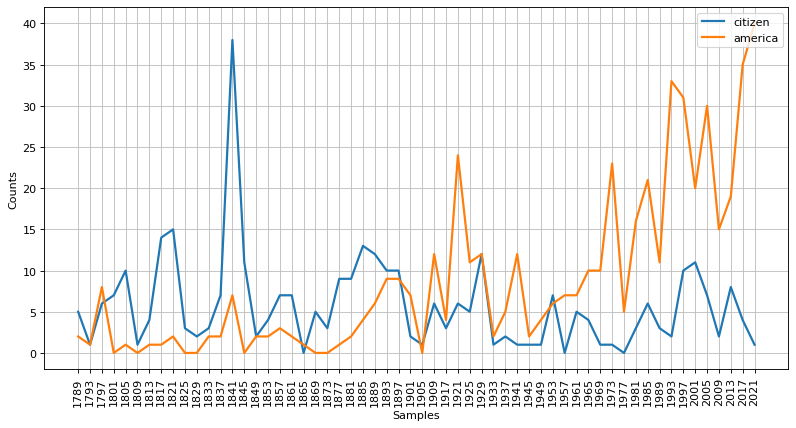

In [ ]:
from nltk.corpus import inaugural
from matplotlib.pyplot import figure

#Wyrysujmy wykres występowania słowa 'citizen' i 'america' w przemowach inaguracyjnych prezydentów USA
figure(figsize=(12, 6), dpi=80)
[]
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) for fileid in inaugural.fileids() for w in inaugural.words(fileid) 
for target in ['america', 'citizen'] if w.lower().startswith(target))
cfd.plot()

# Spacy 

In [ ]:
import spacy

In [ ]:
!spacy download en_core_web_sm

2022-08-06 09:09:29.520045: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 22.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
text1 = ('''
The witcher halted at a distance of ten paces.  His sword, slowly drawn from its black enameled sheath, glistened and glowed above his head.
“It’s silver,” he said.  “This blade is silver.”
The pale little face did not flinch; the anthracite eyes did not change expression.
“You’re so like a rusalka, “the witcher continued calmly, “that you could deceive anyone.  All the more as you’re a rare bird, black-haired one.  But horses are never mistaken.  They recognize creatures like you instinctively and perfectly.  What are you?  I think you’re a moola, or an alpor.  An ordinary vampire couldn’t come out in the sun.”
The corners of the pale lips quivered and turned up a little.
''')

In [ ]:
doc = nlp(text1)

In [ ]:
#Proszę wypisać listę wyrażenia rzeczownikowe i przymiotników,  powyższego tekstu
print(f"Noun phrases: {[chunk.text for chunk in doc.noun_chunks]}")
print(f"Adjectives :{[token for token in doc if token.pos_== 'ADJ' ]}")
print(f"Noun :{[token for token in doc if token.pos_== 'NOUN' ]}")
print(f"Verb :{[token for token in doc if token.pos_== 'VERB' ]}")

Noun phrases: ['\nThe witcher halted', 'a distance', 'ten paces', 'His sword', 'its black enameled sheath', 'his head', 'It', 'silver', 'he', 'This blade', 'silver', 'The pale little face', 'the anthracite eyes', 'expression', 'You', 'a rusalka', 'you', 'anyone', 'you', 'a rare bird', 'horses', 'They', 'creatures', 'you', 'What', 'you', 'I', 'you', 'a moola', 'an alpor', 'An ordinary vampire', 'the sun', 'The corners', 'the pale lips']
Adjectives :[witcher, black, enameled, glistened, pale, little, anthracite, witcher, rare, black, haired, mistaken, ordinary, pale, little]
Noun :[halted, distance, paces, sword, sheath, head, silver, blade, silver, face, eyes, expression, rusalka, bird, horses, creatures, moola, alpor, vampire, sun, corners, lips]
Verb :[drawn, glowed, ’s, said, flinch, change, ’re, continued, deceive, ’re, recognize, think, ’re, come, quivered, turned]


In [ ]:
text2 = ('''
Born and raised in the Austrian Empire, Joe Tesla studied engineering and physics in the 1870s without receiving a 
degree, gaining practical experience in the early 1880s working in telephony and at Continental Edison in the 
new electric power industry. In 1884 he emigrated to the United States, where he became a naturalized citizen. 
He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. 
With the help of partners to finance and market his ideas, Nicola Tesla set up laboratories and companies in 
New York to develop a range of electrical and mechanical devices. His alternating current (AC) induction 
motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable 
amount of money and became the cornerstone of the polyphase system which that company eventually marketed.
''')

In [ ]:
doc = nlp(text2)
#Proszę wypisać Entities powyższego tekstu
for ent in doc.ents:
    print(ent.text, ent.label_)

the Austrian Empire GPE
Joe Tesla PERSON
the 1870s DATE
the early 1880s DATE
Continental Edison ORG
1884 DATE
the United States GPE
the Edison Machine Works FAC
New York City GPE
Nicola Tesla ORG
New York GPE
AC GPE
Westinghouse Electric ORG
1888 DATE


# TF-IDF

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk

In [ ]:
text3 = ('''
The huge black eyes narrowed.
“Where is he, black-haired one?  You were singing, so you’ve drunk some blood.  You’ve taken the ultimate measure, which means you haven’t managed to enslave his mind.  Am I right?”
The black-tressed head nodded slightly, almost imperceptibility, and the corners of the mouth turned up even more.  The tiny little face took on an eerie expression.
“No doubt you consider yourself the lady of this castle now?”
A nod, this time clearer.
“Are you a moola?”
A slow shake of the head.  The hiss which reverberated through his bones could only have come from the pale, ghastly, smiling lips, although the witcher didn’t see them move.
“Alpor?”
Denial.
The witcher backed away and clasped the hilt of his sword tighter.  “That means you’re-”
The corners of the lips started to turn up higher and higher, the lips flew open…
“A bruxa!” The witcher shouted, throwing himself towards the fountain.
From behind the pale lips glistened white, spiky fangs.  The vampire jumped up, arched her back like a leopard and screamed.
''')

In [ ]:
from textblob import TextBlob
import math

# funkcja TF, dla jednego dokumentu
def tf(word, blob):
  return blob.words.count(word) / len(blob.words)
    

#Pomocnicza funkcja zliczająca w ilu dokumentach wystąpiło to słow
def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob)

# funkcja IDF dla wszystkich dokumentów
def idf(word, bloblist): 
    n = n_containing(word, bloblist)
    return math.log(len(bloblist) / (n if n else 1))

#Funkcja TF-IDF
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)


blob1 = TextBlob(text1.lower())
blob2 = TextBlob(text2.lower())
blob3 = TextBlob(text3.lower())
bloblist = [blob1, blob2, blob3]

sample_words = ['rusalka', 'witcher', 'Tesla', 'in', 'vampire', 'the']
for sample_word in sample_words:
    print(f"For word '{sample_word}' TF Score for text1: {tf(sample_word, blob1):0.4}, IDF Score: {idf(sample_word, bloblist):0.4}, TF-IDF Score for text1:{tfidf(sample_word, blob1, bloblist):0.4}")

For word 'rusalka' TF Score for text1: 0.007519, IDF Score: 1.099, TF-IDF Score for text1:0.00826
For word 'witcher' TF Score for text1: 0.01504, IDF Score: 0.4055, TF-IDF Score for text1:0.006097
For word 'Tesla' TF Score for text1: 0.0, IDF Score: 1.099, TF-IDF Score for text1:0.0
For word 'in' TF Score for text1: 0.007519, IDF Score: 0.0, TF-IDF Score for text1:0.0
For word 'vampire' TF Score for text1: 0.007519, IDF Score: 0.4055, TF-IDF Score for text1:0.003049
For word 'the' TF Score for text1: 0.06015, IDF Score: 0.0, TF-IDF Score for text1:0.0


In [ ]:
sample_word = 'tesla'
print(f"For word '{sample_word}' TF Score for text2: {tf(sample_word, blob2):0.4}, IDF Score: {idf(sample_word, bloblist):0.4}, TF-IDF Score for text2:{tfidf(sample_word, blob2, bloblist):0.4}")

sample_word = 'the'
print(f"For word '{sample_word}' TF Score for text2: {tf(sample_word, blob2):0.4}, IDF Score: {idf(sample_word, bloblist):0.4}, TF-IDF Score for text2:{tfidf(sample_word, blob2, bloblist):0.4}")

For word 'tesla' TF Score for text2: 0.01399, IDF Score: 1.099, TF-IDF Score for text2:0.01537
For word 'the' TF Score for text2: 0.06294, IDF Score: 0.0, TF-IDF Score for text2:0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

textlist = [text1, text2, text3]

#Proszę użyć CountVectorizer na naszych 3 dokumentach
count_vect = CountVectorizer()
text_counts = count_vect.fit_transform(textlist)
text_counts.shape

(3, 249)

In [ ]:
#Jak wygląda słownik CountVectorizer? Na co wskazują te liczby?
# count_vect.vocabulary_

In [ ]:
print(f"Index for 'witcher': {count_vect.vocabulary_['witcher']}, index for 'rusalka': {count_vect.vocabulary_['rusalka']}, , index for 'tesla': {count_vect.vocabulary_['tesla']}")

Index for 'witcher': 240, index for 'rusalka': 183, , index for 'tesla': 211


In [ ]:
print(f"For first text 'witcher' count: {text_counts[0, 240]}, for 'rusalka': {text_counts[0, 183]}, for 'tesla' {text_counts[0, 211]}")

For first text 'witcher' count: 2, for 'rusalka': 1, for 'tesla' 0


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
#Wyliczmy TF-IDF za pomocą wbudowanej funkcji sklearn dla naszych tekstów
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_counts)
text_tfidf.shape

(3, 249)

In [ ]:
print(f"TF-IDF or first text - 'witcher': {text_tfidf[0, 240]}, 'rusalka': {text_tfidf[0, 183]}, 'tesla' {text_tfidf[0, 211]}")

TF-IDF or first text - 'witcher': 0.1288257899662849, 'rusalka': 0.08469521620717868, 'tesla' 0.0


In [ ]:
print(f"TF-IDF or second text - 'witcher': {text_tfidf[1, 240]}, 'rusalka': {text_tfidf[1, 183]}, 'tesla' {text_tfidf[1, 211]}")

TF-IDF or second text - 'witcher': 0.0, 'rusalka': 0.0, 'tesla' 0.13135142416047924


In [ ]:
#A jak wyliczyć po prostu TF dla każdego tekstu?
tf_transformer = TfidfTransformer(use_idf=False)
text_tf = tf_transformer.fit_transform(text_counts)
text_tf.shape

(3, 249)

# Tokenizacja

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
sentence = """At eight o'clock on Thursday morning Arthur won't feel very good."""
#Zobaczmy jak zostanie stokenizowanie powyższe zdanie
word_tokenize(sentence)

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'wo',
 "n't",
 'feel',
 'very',
 'good',
 '.']

# Stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk

from nltk.corpus import stopwords
#Wypiszmy zbiór stopwords dla języka angielskiego
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Sprawdźmy dla jakich języków występuje corpus nltk stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """I go to the grocery store to get tomatoes and apples"""
  
#Usuńmy stopwords z powyższego zdania
stop_words = stopwords.words('english')
word_tokens = word_tokenize(example_sent)
filtered_sent = [w for w in word_tokens if not w.lower() in stop_words]
print(filtered_sent)

['go', 'grocery', 'store', 'get', 'tomatoes', 'apples']


# Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
e_words= ["wait", "waiting", "waited", "waits", 'waiter']
# e_words = ['break', 'broke', 'broken']
#Sprawdźmy działanie PorterStemmera na powyższych słowach
porter = PorterStemmer()
for w in e_words:
    root_word = porter.stem(w)
    print(root_word)

wait
wait
wait
wait
waiter


In [ ]:
lancaster = LancasterStemmer()
for w in e_words:
    root_word = lancaster.stem(w)
    print(root_word)

wait
wait
wait
wait
wait


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
sentence="The witcher halted at a distance of ten paces.  His sword, slowly drawn from its black enameled sheath, glistened and glowed above his head. "
#PorterStemmer dla całego zdania
for w in word_tokenize(sentence):
  root_word = porter.stem(w)
  print(root_word)

the
witcher
halt
at
a
distanc
of
ten
pace
.
hi
sword
,
slowli
drawn
from
it
black
enamel
sheath
,
glisten
and
glow
abov
hi
head
.


In [ ]:
lancaster = LancasterStemmer()
word_list = ["friend", "friendship", "friends","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
#Sprawdźmy powyższe słowa za pomocą LancasterStemmer
print("{0:20}{1:20}{2:20}". format("Word", "Porter Stemmer", "Lancaster Stemmer"))
for w in word_list:
  print("{0:20}{1:20}{2:20}". format(w, porter.stem(w), lancaster.stem(w)))

Word                Porter Stemmer      Lancaster Stemmer   
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


In [ ]:
text = "studies studying cries cry"
#Użyjmy PorterSemmera dla powyższych słów
tokenization = word_tokenize(text)
for w in tokenization:
  print(f"Stemming for {w} is {porter.stem(w)}")

# Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
#Sprawdźmy działanie WordNetLemmatizer dla powyższych słów


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
#Proszę wypisać porównanie pomiędzy wynikiem lematyzacji dla powyższych wyrazów, pomijając znaki interpunkcyjne


print("{0:20}{1:20}".format("Word", "Lemma"))
for w in tokenize:
  print("{0:20}{1:20}".format(None, None))

In [ ]:
print("{0:20}{1:35}{2:35}".format("Orginal","Part of Speech tag set to Verb","Part of Speech tag set to Noun"))
#Wypiszmy porównanie tak jak powyżej ale ustawmy paramter lematyzacji na pos='v' albo pos='n')
for w in tokenize:
  print("{0:20}{1:35}{2:35}".format(None,None,None))

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
#poniżej przygotowany słownik pod Part Of Speech Tags jako argument to lematyzacji
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
lemma_function = WordNetLemmatizer()

text = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
#Proszę wykonać lematyzację dla powyższych wyrazów, z uwzględnieniem poprawnych POS



In [ ]:
text="The witcher halted at a distance of ten paces.  His sword, slowly drawn from its black enameled sheath, glistened and glowed above his head. "
# tokens = word_tokenize(text)
#Tak jak powyżej, dla nowego zdania



In [ ]:
tag_map

# Regular Expressions

In [ ]:
import re

In [ ]:
re.search(r'k.t', 'test k4t')

In [ ]:
text = 'tottt test'
if re.search(r'^k', text):
  print(text + text)
else:
  print("Pattern not found")

In [ ]:
re.search(r'kot+', 'kottttttttttt')

In [ ]:
re.search(r'^t', 'kottt test')

In [ ]:
re.search(r't$', 'bottttest')

In [ ]:
re.search(r'k[oa]t', 'kct')

In [ ]:
re.search(r'k[a-d]t', 'ket')

In [ ]:
re.search(r'k[1-4]t', 'k3.3t')

In [ ]:
re.search(r'.+t\b', 'bottttest')

In [ ]:
re.search(r'\d\d', '20')

In [ ]:
re.search(r'k\st', 'k t')

In [ ]:
re.search(r'k\St', 'kot')

# Word Terms Disambiguation

In [ ]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
sentence = 'This device is used to jam the signal'
#Proszę sprawdzić definicję słówka 'jam' za pomocą funkcji lesk


In [ ]:
sentence = 'I am stuck in a traffic jam'
#Proszę sprawdzić definicję słówka 'jam' za pomocą funkcji lesk


In [ ]:
sentence = 'Water current'
#Proszę sprawdzić definicję słówka 'current' za pomocą funkcji lesk


In [ ]:
sentence = 'The current time is 2 AM'
#Proszę sprawdzić definicję słówka 'current' za pomocą funkcji lesk


# Parsing Tree

In [ ]:
import nltk

#Poniżej zdefiniowana prosta gramatyka
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
groucho_grammar.productions()

In [ ]:
from nltk.grammar import *

groucho_grammar.productions(lhs=Nonterminal("NP"))

In [ ]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

In [ ]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]


In [ ]:
pp[0].lhs()

In [ ]:
pp[0].rhs()

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
#Wyznaczmy drzewo składniowe dla powyższego zdania zgodnie ze zdefiniowaną gramatyką


In [ ]:
#wyrysujmy te drzewo


In [ ]:
#wyrysujmy te drzewo w przystępnej formie graficznej


In [ ]:
#Czy istnieje inne drzewo? Oznaczające inną interpretacje zdania?


# NER

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
nlp.get_pipe("ner").labels


In [ ]:
doc = nlp('London is a big city in the United Kingdom the United States.')
print("\n-------Example 1 ------\n")
#Proszę wypisać wpydowane w spacy Entities dla powyższego zdania


doc1 = nlp('While in France, Christine Lagarde discussed short-term stimulus efforts in a '
           'recent interview on 5:00 P.M. with the Wall Street Journal')
print("\n-------Example 2 ------\n")
#Proszę wypisać wpydowane w spacy Entities dla powyższego zdania


In [ ]:
for token in doc1:
    print(token.text, token.pos_, token.tag_)

In [ ]:
!spacy download pl_core_news_sm
import spacy
nlp_pl=spacy.load("pl_core_news_sm")

In [ ]:
nlp_pl.get_pipe("ner").labels

In [ ]:
doc=nlp_pl("Tomek pracuje w Tesli")
#A Entities dla języka polskiego?


In [ ]:
doc=nlp("Wcale nie chcemy zdobywać kosmosu, chcemy tylko rozszerzyć Ziemię do jego granic.")
#A Entities dla języka polskiego?


In [ ]:
doc1 = nlp_pl(u'Francja leży w Europie')
#A Entities dla języka polskiego?


# Embeddings

In [ ]:
import nltk
nltk.download('brown')

In [ ]:
from gensim.test.utils import common_texts
from nltk.corpus import brown    
sentences = brown.sents()
from gensim.models import Word2Vec

#Proszę wytrenować model Word2Vec za pomocą korpusu brown, długość embeddingu - 100, wielkość okna - 5, 
#wziąć pod uwagę słowo jeśli występuje chociaż raz, liczbę epok ustawić na 10
#na końcu zapisać model


In [ ]:
#Jak wygląda embedding dla przykładowego słowa?
model.wv['computer']

In [ ]:
#Jakie jest 10 najbliższych wektorów do słówka 'wine'?


In [ ]:
nltk.download('webtext')


In [ ]:
nltk.download('punkt')

In [ ]:
from nltk.corpus import webtext   
sentences_web = webtext.sents()

#Proszę załadować zapisany model i kontynuować trenowanie dla corpusu webtext, przez 4 epoki


In [ ]:
#Jakie jest 10 najbliższych wektorów do słówka 'wine' teraz?


In [ ]:
#Co się stanie gdy się zapytamy o niewystępujące słowo?


In [ ]:
#Proszę znaleść najbliższe wektory dla "algebry emebddingów": king - man + woman


In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

In [ ]:
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
w2v_vectors.most_similar(w2v_vectors['father'] - w2v_vectors['man'] + w2v_vectors['woman'], topn=10)

In [ ]:
w2v_vectors.most_similar('wine', topn=10)

In [ ]:
#Jakie jest 10 najbliższych wektorów do słówka 'dog'?
w2v_vectors.most_similar('dog', topn=10)

In [ ]:
#Proszę znaleść najbliższe wektory dla "algebry emebddingów": death - man + computer
w2v_vectors.most_similar(w2v_vectors['death'] - w2v_vectors['man'] + w2v_vectors['computer'], topn=10)

In [ ]:
w2v_vectors['death'].shape

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition  import PCA
import numpy as np

def to_2d(embeddings):
    # To reduce embedding dims without losing much information we use PCA
    pca = PCA(n_components=2, whiten=True)
    pca.fit(embeddings)
    return pca.transform(embeddings)


def annotated_scatter(points, names, color='blue'):
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    plt.scatter(x_coords, y_coords, c=color)
    for label, x, y in zip(names, x_coords, y_coords):
                      plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min() - .5, x_coords.max() + .5)
    plt.ylim(y_coords.min() - .5, y_coords.max() + .5)

    
def plot_embeddings(embeddings, names, color='blue', show=True):
    X_train = np.array([embeddings[k] for k in names])
    embeddings_2d = to_2d(X_train)
    
    annotated_scatter(embeddings_2d, names, color)
    plt.grid()
    
    if show:
        plt.show()

In [ ]:
near_dog = [elem[0] for elem in w2v_vectors.most_similar(w2v_vectors['dog'])]
near_computer = [elem[0] for elem in w2v_vectors.most_similar(w2v_vectors['computer'])]
len(near_computer)

In [ ]:
plot_embeddings(w2v_vectors, 
                near_dog + near_computer, 
                color=['red'] * len(near_dog) + ['green'] * len(near_computer))

In [ ]:
from collections import namedtuple
import matplotlib.lines as mlines
from matplotlib import cm

LinearSubs = namedtuple('LinearSubs', 
                        ('word_pair', 'name'))

def plot_linear_substructures(linear_subs, embeddings):
    embeddings_matrix = [embeddings[p] for ls in linear_subs for p in ls.word_pair]
    embeddings_matrix = np.array(embeddings_matrix)
    pair_names = [p for ls in linear_subs for p in ls.word_pair]
    ls_names = [ls.name for ls in linear_subs]
    embeddings_2d = to_2d(embeddings_matrix)
    annotated_scatter(embeddings_2d, 
                      pair_names, 
                      cm.Set1.colors[:len(embeddings_2d)])
    
    for i in range(0, len(embeddings_2d), 2):
        p1 = embeddings_2d[i]
        p2 = embeddings_2d[i + 1]
        # Center of the linear substructure
        center = [(p1[i] + p2[i]) / 2 + .04 for i in range(2)]
        
        plt.plot(*zip(p1, p2), '--')
        plt.annotate(ls_names[i // 2], 
                     xy=center, 
                     xytext=(0, 0), textcoords='offset points')

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_linear_substructures([LinearSubs(('man', 'woman'), 'sex'),
                           LinearSubs(('king', 'queen'), 'sex'),
                           LinearSubs(('mother', 'father'), 'sex')], w2v_vectors)

plt.subplot(132)
plot_linear_substructures([LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'bird'), 'family')], w2v_vectors)

plt.subplot(133)
plot_linear_substructures([LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')], w2v_vectors)

In [ ]:
#Glove 6B

!curl -OL http://nlp.stanford.edu/data/glove.6B.zip -o glove.6B.zip
#wget
# !wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!unzip -o glove.6B.zip
# !unzip -o /content/glove.6B.zip

In [ ]:
glove_embeddings = {}
with open('glove.6B.300d.txt') as f:
    glove_embeddings = {l.split()[0]: np.array(l.split()[1:]).astype('float') for l in f}

In [ ]:
glove_embeddings['computer'].shape

In [ ]:
def get_closest(x, embeddings, topn=3):
    """
    Get the closest embeddings calculating the euclidean distance
    Parameters
    ----------
    x: np.ndarray
      Vector containing an embedding
    top_k: int, optional
      Get the top k similar embeddings
    Returns
    -------
    dict
      Dict containing the top k similar embeddings to the given x
    """
    # Stack all embeddings in a single matrix. Note: the matrix dimention will be
    # V x D where V is the vocabulary size and D is the embedding dimension
    embedding_matrix = np.array(list(embeddings.values()))
    # Using broadcasting compute distance to each embedding in our vocabulary
    distances = x - embedding_matrix
    # Comoute the magnitude of each distance
    distances = np.linalg.norm(distances, axis=1)
    # Sort distance and keep the smallest k
    min_idx = np.argsort(distances)[:topn]
    return [list(embeddings)[i] for i in min_idx]

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plot_linear_substructures([LinearSubs(('man', 'woman'), 'sex'),
                           LinearSubs(('king', 'queen'), 'sex'),
                           LinearSubs(('mother', 'father'), 'sex')], glove_embeddings)

plt.subplot(132)
plot_linear_substructures([LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'bird'), 'family')], glove_embeddings)

plt.subplot(133)
plot_linear_substructures([LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')], glove_embeddings)

In [ ]:
get_closest(glove_embeddings['Rome'] - glove_embeddings['Italy'] + glove_embeddings['France'], glove_embeddings)

In [ ]:
# vectors = {name: gensim.downloader.load(name) for name in list(gensim.downloader.info()['models'].keys())}

In [ ]:
# word1 = 'king'
# word2 = 'man'
# word3 = 'woman'
# for name, vector in vectors.items():
#     try:
#         result = vector.most_similar(vector[word1] - vector[word2] + vector[word3])
#     except:
#         print(f"Calcuation not possible for {name}")
#         print('-'*60)
#     else:
#         print(f"Embedding: {name}")
#         for i in result:
#             print(i, end="\n")
#         print('-'*60)

In [ ]:
# word1 = 'father'
# word2 = 'man'
# word3 = 'woman'
# for vector, name in zip(vectors, gensim.downloader.info()['models'].keys()):
#     try:
#         result = vector.most_similar(vector[word1] - vector[word2] + vector[word3])
#     except:
#         print(f"Calcuation not possible for {name}")
#         print('-'*60)
#     else:
#         print(f"Embedding: {name}")
#         for i in result:
#             print(i, end="\n")
#         print('-'*60)

In [ ]:
# word1 = 'death'
# word2 = 'man'
# word3 = 'computer'
# for vector, name in zip(vectors, gensim.downloader.info()['models'].keys()):
#     try:
#         result = vector.most_similar(vector[word1] - vector[word2] + vector[word3])
#     except:
#         print(f"Calcuation not possible for {name}")
#         print('-'*60)
#     else:
#         print(f"Embedding: {name}")
#         for i in result:
#             print(i, end="\n")
#         print('-'*60)